In [2]:
import numpy as np
import pandas as pd
from sqlalchemy import exists
from wombat.models import dbsession, engine
from wombat.models import Item, RentalItem, Rental
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)
%matplotlib inline


In [3]:
items = dbsession.query(Item).all()
# res = find_by_item_type("dresses")
query = "SELECT I.id, I.brand, I.item_type, I.cost, I.sku, \
    I.rent_per_week, I.created_at, I.title, I.description, \
    I.year_purchased, R.rental_date, R.return_date, \
    RI.item_price, RI.refunded, RI.fit_return \
    FROM items I \
    LEFT JOIN rental_items RI ON I.id = RI.item_id \
    LEFT JOIN rentals R ON R.id = RI.rental_id;"
df = pd.read_sql_query(query, engine)

,id,brand,item_type,cost,sku,rent_per_week,created_at,title,description,year_purchased,rental_date,return_date,item_price,refunded,fit_return
0,8142,Self-Portrait,dresses,520.0,None,99.0,2017-06-01 16:48:56.14973,Ava guipure lace mini dress,Self-Portrait's 'Ava' mini dress is perfect fo...,None,None,None,NaN,None,None
1,8141,Tibi,dresses,695.0,None,69.0,2017-05-31 19:18:47.749137,Lurex Dress,"Tibi Detailed with metallic gold fil coupe, th...",None,None,None,NaN,None,None
2,8140,Christian Louboutin,shoes,1977.0,None,125.0,2017-05-30 22:01:01.996902,Sexy Strass 100 Swarovski crystal peep-toe pumps,"A stunning bridal option, Christian Louboutin'...",None,None,None,NaN,None,None
3,8139,Monique Lhuillier,dresses,239.0,None,33.9,2017-05-30 20:15:59.124923,The Diamond Back Dress,A beautiful navy blue lace dress with a diamon...,None,None,None,NaN,None,None
4,8138,Theia,dresses,350.0,None,45.5,2017-05-30 19:44:25.284013,Sparkling Cocktail dress,Flattering scoop neck bodycon dress with glist...,None,None,None,NaN,None,None
5,8137,Adrianna Papell,dresses,349.0,None,49.0,2017-05-30 18:27:46.093921,Long V-Neck Beaded Gown Gunmetal,This floor sweeping gown from Adrianna Papell ...,None,None,None,NaN,None,None
6,8136,ML Monique Lhuillier,dresses,798.0,None,89.0,2017-05-30 17:52:19.630477,Lace Backout Gown,This dress is perfect for your next formal occ...,None,None,None,NaN,None,None
7,8135,Saint Laurent,bags,2650.0,None,110.0,2017-05-30 17:13:07.560002,Baby Sac De Jour,Signature Saint Laurent bag with tubular handl...,None,None,None,NaN,None,None
8,8134,kathlin argiro,dresses,400.0,None,50.0,2017-05-28 23:45:33.250649,pink kathlin argiro cocktail dress,Beautiful Kathlin Argiro dress! 98%polyster pi...,2010,None,None,NaN,None,None
9,8133,For Love & Lemons,dresses,292.0,None,45.0,2017-05-24 20:55:19.492895,Valentina Mini Dress,"Inspired from travels to Europe, this mini was...",None,None,None,NaN,None,None


In [83]:
df['rent_per_week']

0        99.0
1        69.0
2       125.0
3        33.9
4        45.5
5        49.0
6        89.0
7       110.0
8        50.0
9        45.0
10       45.0
11       35.0
12       35.0
13       35.0
14       35.0
15       58.0
16       40.0
17       35.0
18       30.0
19       35.0
20       40.0
21       40.0
22       55.0
23      100.0
24      100.0
25       45.0
26       49.0
27       40.0
28       35.0
29       35.0
        ...  
7358     47.0
7359     62.0
7360     52.0
7361    122.0
7362     52.0
7363     67.0
7364     32.0
7365     42.0
7366     32.0
7367    152.0
7368    152.0
7369     47.0
7370     32.0
7371     37.0
7372     32.0
7373     52.0
7374     61.0
7375     66.0
7376     48.0
7377     49.0
7378     50.0
7379     52.0
7380     52.0
7381     42.0
7382     87.0
7383    152.0
7384     42.0
7385    352.0
7386     57.0
7387     57.0
Name: rent_per_week, Length: 7388, dtype: float64

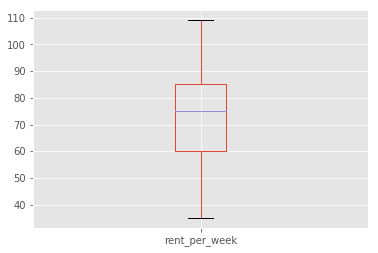

In [92]:
#df[df['item_type'] == 'skirts']
#df.plot(x = 'timestamp'', y = ['free_bikes', 'total_slots’],
#      style = ‘o-‘, title = station_name);
# df[0:100].plot.scatter(x='id', y='rent_per_week')


df.loc[df['brand'] == 'Self-Portrait'].boxplot('rent_per_week')

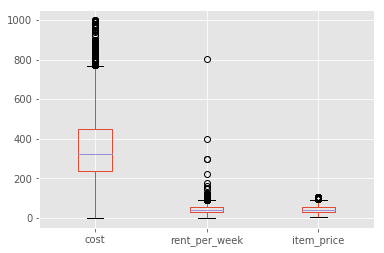

In [109]:
new_df = df.loc[(df['rent_per_week'] < 1000) & (df['cost'] < 1000)].drop('id', 1).boxplot()

In [116]:
df.loc[(df['rent_per_week'] < 1000) & (df['cost'] < 1000) & (df['rental_date'])]

,id,brand,item_type,cost,sku,rent_per_week,created_at,title,description,year_purchased,rental_date,return_date,item_price,refunded,fit_return
4261,3029,Self-Portrait,dresses,505.0,None,75.0,2015-10-23 18:22:02.228972,Striped Honeycomb-Mesh Midi Dress,Striped honeycomb-mesh midi dress by Self-Port...,None,2016-02-15,2016-02-21,55.0,False,False
4290,3011,Gypsy Princess Halloween Costume,dresses,395.0,None,50.0,2015-10-22 16:25:23.099721,Gypsy Princess,Gypsy Princess Halloween Costume includes adju...,None,2016-02-13,2016-02-19,50.0,False,False
4360,2943,Jimmy Choo,shoes,675.0,None,60.0,2015-10-09 15:35:29.891837,Anouk Patent Leather Pumps,A true classic and sleek design. The Anouk Pat...,None,2015-10-16,2015-10-21,50.0,False,False
4458,2885,Finders Keepers,dresses,248.0,None,25.0,2015-10-02 20:51:31.967716,Tropical Bustier Top,Tropical patterned bustier top from Finders Ke...,None,2015-10-22,2015-10-28,25.0,False,True
4465,2883,Self Portrait,dresses,520.0,None,50.0,2015-10-02 20:44:46.415231,Long-Sleeve Tiered Lace Dress in Dark Maroon,Self Portrait dress in guipure lace.\nMock nec...,None,2015-11-05,2015-11-11,50.0,False,False
4474,2875,Adrianna Papell,dresses,350.0,10821130,75.0,2015-10-02 20:03:15.209563,Floral Ball Gown,Floral Jacquard A-line ball gown featuring ful...,2014,2015-11-12,2015-11-18,65.0,False,True
4531,2842,Pierre Balmain,dresses,525.0,None,60.0,2015-09-30 21:10:43.708546,Black Lace Midi Fitted Dress,"Elegant sheer floral lace. Round neckline, sle...",None,2015-12-11,2015-12-17,50.0,False,False
4594,2775,Elizabeth and James,dresses,385.0,N6002554,50.0,2015-09-23 22:31:25.77116,Blush Long Sleeve Tunic Dress,Brigette Washed-silk Mini Dress in Blush inclu...,2013,2015-12-31,2016-01-06,40.0,False,False
4605,2771,Helmut Lang,dresses,520.0,None,65.0,2015-09-23 19:38:45.648529,White Cross Tuck Dress,This two-tone crepe Helmut Lang dress features...,None,2015-12-03,2015-12-09,55.0,False,False
4636,2747,Badgley Mischka,dresses,790.0,None,55.0,2015-09-21 20:24:21.212708,Saphirre Chiffon Gown,Badgley Mischka Chiffon Halter Evening Gown. S...,None,2015-12-05,2015-12-11,55.0,False,False


In [118]:
df['rental_date'].

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
7358    None
7359    None
7360    None
7361    None
7362    None
7363    None
7364    None
7365    None
7366    None
7367    None
7368    None
7369    None
7370    None
7371    None
7372    None
7373    None
7374    None
7375    None
7376    None
7377    None
7378    None
7379    None
7380    None
7381    None
7382    None
7383    None
7384    None
7385    None
7386    None
7387    None
Name: rental_date, Length: 7388, dtype: object

In [ ]:
df.loc[(df['rent_per_week'] < 1000) & (df['cost'] < 1000) & (df['rental_date'])]

In [ ]:
items = dbsession.query(Item).all()
print(items[0].rental.item_price)

In [1]:
from wombat.engine import main

In [18]:
items = main.get_top_n_similar_items("Gown with Long Sleeves and Deep V")
l = [item.cost for item in items]
# df = pd.DataFrame.from_records(l)
a = np.array(l)
np.std(l, 0)
l

[398.0, 350.0, 179.0, 850.0, 224.0, 395.0, 247.99, 385.0, 208.0, 190.0, 189.0]

In [33]:
df[['id', 'brand']].groupby(['brand']).agg('count').sort_values('id', ascending=0)

,id
brand,
LENDER SUBMISSION FILL IN,264
For Love & Lemons,216
Self-Portrait,164
BCBGMAXAZRIA,134
BCBG,127
Chanel,125
Alice + Olivia,125
Adrianna Papell,113
Parker,94


In [34]:
df[['id', 'item_type']].groupby(['item_type']).agg('count').sort_values('id', ascending=0)

,id
item_type,
dresses,5982
shoes,310
bottoms,265
accessories,262
tops,214
bags,191
outerwear,138
skirts,10
pants,6


In [44]:
df[['brand', 'item_type']].groupby(['brand', 'item_type'])

In [10]:
res = engine.execute('SELECT DISTINCT brand, COUNT(brand) FROM items GROUP BY brand;').fetchall()
res

[('Night Moves', 1),
 ('Foley & Corina', 6),
 ('C/Meo Collective', 1),
 ('David Meister ', 1),
 ('Jean Paul Gaultier', 2),
 ('J McLaughlin', 1),
 ('AD', 2),
 ('House of Harlow by REVOLVE', 1),
 ('Nasty Gal', 2),
 ('Reiss', 9),
 ('chanel', 1),
 ('BCBG Max Azria ', 5),
 ('Lela Rose', 6),
 ('self portrait', 1),
 ('unknown ', 1),
 ('Asilio', 1),
 ('Lilly for Target', 1),
 ('David Dielden', 1),
 ('herve  leger', 1),
 ('Rina Dhaka ', 1),
 ('Josh Goot', 1),
 ('Clare Vivier', 1),
 ('David Lerner', 1),
 ('BCBGMAXAZRIA', 108),
 ('Dolce & Gabbana', 22),
 ('Alexander McQueen ', 11),
 ('Lillie Rubin', 1),
 ('Shakuhachi ', 1),
 ('Louboutin Pigalle Multiglitter', 1),
 ('Here Comes The Sun', 1),
 ('Mason By Michelle Mason', 1),
 ('Lauren Ralph Lauren', 7),
 ('Kate spade new york', 1),
 ('Vintage Unknown', 2),
 ('John Galliano ', 1),
 ('asdf', 1),
 ('Crysellas', 1),
 ('Kelima', 1),
 ('Armani exchange ', 1),
 ('FF', 1),
 ('Chalayan', 1),
 ('Frye', 1),
 ('Larisa Barrera', 2),
 ('May Queen', 1),
 ('saint 

In [5]:
query = 'SELECT DISTINCT brand, COUNT(brand) FROM items GROUP BY brand ORDER BY count(brand) DESC LIMIT 30;'
df = pd.read_sql_query(query, engine)

,brand,count
0,LENDER SUBMISSION FILL IN,264
1,BCBG,125
2,BCBGMAXAZRIA,108
3,Alice + Olivia,107
4,Adrianna Papell,92
5,For Love & Lemons,90
6,Nicole Miller,84
7,Parker,77
8,Lovers + Friends,66
9,Dress the Population,66


['01', '03', '40']


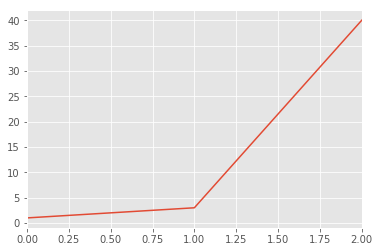

In [33]:
a = ['01 boat', '03 wind', '40 water']
a = [i.split(' ')[0] for i in a]
df = pd.Series(a).apply(int).plot()
#print(a2)

#s.dtype
df

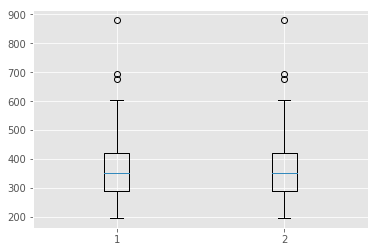

In [85]:
items = dbsession.query(Item).filter(
            Item.brand == "Nicole Miller", 
            Item.item_type == "dresses").all()
c = [item.cost for item in items]
d = c
e = [c, d]
#df = pd.Series(c).plot.box()
import matplotlib.pyplot as plt
plt.boxplot(e)
plt.show()
fig = plt.figure()

In [ ]:
items = dbsession.query(Item).filter(
            Item.brand == "Nicole Miller", 
            Item.item_type == "dresses").all()

In [60]:
items = dbsession.query(Item).all()
# res = find_by_item_type("dresses")
query = "SELECT I.id, I.brand, I.item_type, I.cost, I.sku, \
    I.rent_per_week, I.created_at, I.title, I.description, \
    I.year_purchased, R.rental_date, R.return_date, \
    RI.item_price, RI.refunded, RI.fit_return \
    FROM items I \
    LEFT JOIN rental_items RI ON I.id = RI.item_id \
    LEFT JOIN rentals R ON R.id = RI.rental_id;"
df = pd.read_sql_query(query, engine)
df[df['rental_date'].notnull]

TypeError: notnull() takes 1 positional argument but 2 were given

In [ ]:
brand_query = "SELECT brand, count(brand) FROM items GROUP BY brand ORDER BY count(brand) DESC LIMIT 10;"
brand_df = pd.read_sql_query(brand_query, engine)

def get_attr_by_brand(brand, item_type, attr):
    return df.loc[(df['brand'] == brand) & (df['item_type'] == item_type)][attr]


In [ ]:
groups = df.groupby('brand')
groups.boxplot()

KeyboardInterrupt: 

In [ ]:
brand_query = "SELECT item_type, count(item_type)) FROM items GROUP BY item_type ORDER BY count(item_type) DESC LIMIT 10;"
brand_df = pd.read_sql_query(brand_query, engine)